# WeatherPy


In [1]:
# Analysis:
    
# As the latitude incredses or decreases, temperature decreases (City Latitude vs. Max Temperatute plot)   
# There is a strong negative correlatiion between latutude and Max Temperature for Northern Hemisphere (The r-squared is: -0.81)    
# Cloudiness and the wind speed are spread across the latitude (City Latitude vs. Cloudiness and City Latitude vs. Wind Speed plot)  
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json 
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities[:5]

['pilar', 'kapaa', 'mount gambier', 'sorvag', 'san cristobal']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"
city = "kapaa"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")

print(json.dumps(weather_json, indent=4, sort_keys=True))

        

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 22.08,
        "lon": -159.32
    },
    "dt": 1591750991,
    "id": 5848280,
    "main": {
        "feels_like": 80.98,
        "humidity": 70,
        "pressure": 1018,
        "temp": 81.86,
        "temp_max": 84.2,
        "temp_min": 80.01
    },
    "name": "Kapaa",
    "sys": {
        "country": "US",
        "id": 7873,
        "sunrise": 1591717990,
        "sunset": 1591766426,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 16093,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 70,
        "speed": 16.11
    }
}


In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat=[]
temp=[]
lon=[]
humidity=[]
cloudiness=[]
wind_speed=[]
city_names=[]
country=[]
date=[]

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval")
print("-----------------------------")
record_count = 1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_names.append(city)   
    
        #time.sleep(1)
        
        print(f"Processing Record {record_count} | {city}") 
        record_count= record_count + 1
    except:
        print("City is not found.")
print("___________End of Retrieval_____________")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | pilar
Processing Record 2 | kapaa
Processing Record 3 | mount gambier
City is not found.
Processing Record 4 | san cristobal
Processing Record 5 | kaitangata
Processing Record 6 | punta arenas
City is not found.
Processing Record 7 | ushuaia
Processing Record 8 | tezpur
Processing Record 9 | balaipungut
Processing Record 10 | del rio
Processing Record 11 | luanda
City is not found.
Processing Record 12 | piranhas
Processing Record 13 | butaritari
Processing Record 14 | georgetown
Processing Record 15 | lazaro cardenas
Processing Record 16 | qasigiannguit
Processing Record 17 | talnakh
Processing Record 18 | albany
Processing Record 19 | puerto ayora
Processing Record 20 | chokurdakh
Processing Record 21 | omboue
Processing Record 22 | kamenka
Processing Record 23 | bambous virieux
Processing Record 24 | goderich
Processing Record 25 | atuona
Processing Record 26 | khatanga
Processing Record 27 | hermanus
Proce

Processing Record 239 | antalaha
Processing Record 240 | ganzhou
Processing Record 241 | lompoc
City is not found.
Processing Record 242 | mehran
Processing Record 243 | fairbanks
Processing Record 244 | kushmurun
Processing Record 245 | abu dhabi
Processing Record 246 | pemangkat
Processing Record 247 | ivankiv
Processing Record 248 | paita
Processing Record 249 | kieta
Processing Record 250 | lebu
Processing Record 251 | gat
Processing Record 252 | laguna
Processing Record 253 | college
Processing Record 254 | baruun-urt
Processing Record 255 | tonantins
Processing Record 256 | sorland
Processing Record 257 | yatou
Processing Record 258 | benguela
Processing Record 259 | gnjilane
Processing Record 260 | itarema
Processing Record 261 | norrtalje
Processing Record 262 | matagami
Processing Record 263 | mareeba
Processing Record 264 | chake chake
Processing Record 265 | mchinji
City is not found.
City is not found.
Processing Record 266 | madimba
Processing Record 267 | bethel
Processin

Processing Record 476 | susanville
Processing Record 477 | santo angelo
Processing Record 478 | peace river
Processing Record 479 | zabolotiv
Processing Record 480 | dalnerechensk
Processing Record 481 | catamarca
Processing Record 482 | kincardine
Processing Record 483 | patrocinio
City is not found.
Processing Record 484 | hamada
Processing Record 485 | muros
Processing Record 486 | richards bay
Processing Record 487 | riverton
Processing Record 488 | edson
Processing Record 489 | porto nacional
City is not found.
Processing Record 490 | sisimiut
Processing Record 491 | praia da vitoria
Processing Record 492 | katherine
Processing Record 493 | jand
Processing Record 494 | mattoon
City is not found.
Processing Record 495 | kirakira
Processing Record 496 | trairi
Processing Record 497 | quatre cocos
Processing Record 498 | sola
Processing Record 499 | alofi
Processing Record 500 | gandiaye
Processing Record 501 | labuhan
Processing Record 502 | mitu
Processing Record 503 | togur
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
main_df = pd.DataFrame(
    {"City": city_names,
     "Country": country,
     "Lat": lat,
     "Lng": lon,
     "Max Temperature (F)": temp,
     "Humidity (%)": humidity,
     "Cloudiness (%)": cloudiness,
     "Wind Speed (mph)": wind_speed,
     "Date(dt)": date
    })

main_df


,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
0,pilar,BR,-9.60,-35.96,75.20,88,75,1.12,1591750991
1,kapaa,US,22.08,-159.32,84.20,70,40,16.11,1591750991
2,mount gambier,AU,-37.83,140.77,44.60,87,0,8.05,1591750991
3,san cristobal,VE,7.77,-72.22,86.00,48,75,21.92,1591750992
4,kaitangata,NZ,-46.28,169.85,55.51,58,15,12.06,1591750992
...,...,...,...,...,...,...,...,...,...
559,tarko-sale,RU,64.92,77.78,63.00,78,100,7.18,1591751105
560,panama city,PA,8.99,-79.52,78.80,88,75,3.36,1591750935
561,san ramon de la nueva oran,AR,-23.13,-64.33,63.12,86,100,1.59,1591751105
562,ames,US,42.03,-93.62,75.20,78,75,9.17,1591750912


In [7]:
main_df.count()

City                   564
Country                564
Lat                    564
Lng                    564
Max Temperature (F)    564
Humidity (%)           564
Cloudiness (%)         564
Wind Speed (mph)       564
Date(dt)               564
dtype: int64

In [8]:
# Export the City_Data into a csv

main_df.to_csv("output_data/cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# #drop records with humidity over a hundred, new ref to data frame updated_df
# updated_df = main_df.loc[main_df["Cities"]["Humidity (%)"]]

main_df["Humidity (%)"].max()


100

In [10]:
# Get the indices of cities that have humidity over 100%.

hum_ind_df = main_df[main_df['Humidity (%)'] > 100].index
print(hum_ind_df)


Int64Index([], dtype='int64')


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data_df = main_df[main_df['Humidity (%)'] <= 100] 
clean_city_data_df


,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
0,pilar,BR,-9.60,-35.96,75.20,88,75,1.12,1591750991
1,kapaa,US,22.08,-159.32,84.20,70,40,16.11,1591750991
2,mount gambier,AU,-37.83,140.77,44.60,87,0,8.05,1591750991
3,san cristobal,VE,7.77,-72.22,86.00,48,75,21.92,1591750992
4,kaitangata,NZ,-46.28,169.85,55.51,58,15,12.06,1591750992
...,...,...,...,...,...,...,...,...,...
559,tarko-sale,RU,64.92,77.78,63.00,78,100,7.18,1591751105
560,panama city,PA,8.99,-79.52,78.80,88,75,3.36,1591750935
561,san ramon de la nueva oran,AR,-23.13,-64.33,63.12,86,100,1.59,1591751105
562,ames,US,42.03,-93.62,75.20,78,75,9.17,1591750912


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

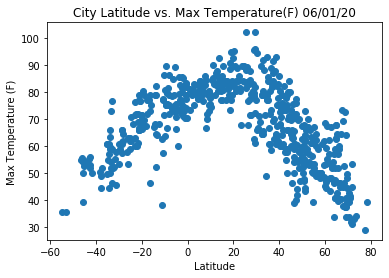

In [12]:
# Plot latitude versus temperature
x_values = main_df["Lat"]
y_values = main_df['Max Temperature (F)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Max Temperature(F) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("../Python_API/output_data/City Latitude vs. Max Temperature(F).png")
plt.show()


## Latitude vs. Humidity Plot

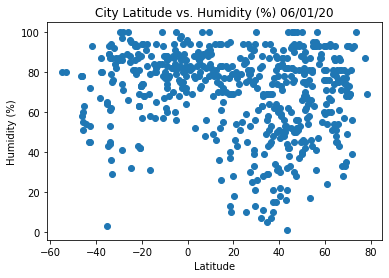

In [13]:
# Plot latitude versus humidity 
x_values = main_df["Lat"]
y_values = main_df['Humidity (%)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Humidity (%) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("../Python_API/output_data/City Latitude vs. Humidity (%).png")
plt.show()

## Latitude vs. Cloudiness Plot

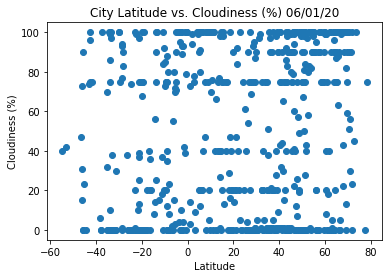

In [14]:
# Plot latitude versus cloudiness
x_values = main_df["Lat"]
y_values = main_df['Cloudiness (%)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Cloudiness (%) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("../Python_API/output_data/City Latitude vs. Cloudiness (%).png")
plt.show()

## Latitude vs. Wind Speed Plot

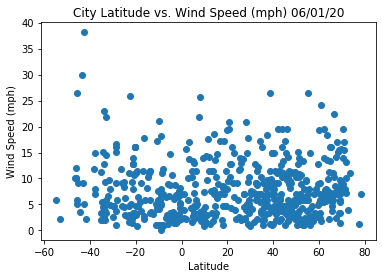

In [15]:
# Plot latitude versus wind speed plot
x_values = main_df["Lat"]
y_values = main_df['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Wind Speed (mph) 06/01/20")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("../Python_API/output_data/City Latitude vs. Wind Speed (mph).png")
plt.show()

## Linear Regression

In [16]:
# Create a function to create Linear Regression plots

def linearplot(x_values,y_values,y_label, coor):
    

    print(f"The r-squared is: {round(st.pearsonr(x_values, y_values)[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coor,fontsize=15,color="red")
 
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
   
 


In [17]:
# Create Northern and Southern Hemisphere DataFrames
n_df= main_df.loc[main_df["Lat"]>= 0]

s_df= main_df.loc[main_df["Lat"]< 0]

n_df.head()

,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
1,kapaa,US,22.08,-159.32,84.20,70,40,16.11,1591750991
3,san cristobal,VE,7.77,-72.22,86.00,48,75,21.92,1591750992
7,tezpur,IN,26.63,92.80,83.01,76,0,2.26,1591750695
8,balaipungut,ID,1.05,101.28,81.07,81,73,3.94,1591750993
9,del rio,US,29.36,-100.90,102.20,13,1,10.29,1591750867


In [18]:
s_df.head()

,City,Country,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date(dt)
0,pilar,BR,-9.60,-35.96,75.20,88,75,1.12,1591750991
2,mount gambier,AU,-37.83,140.77,44.60,87,0,8.05,1591750991
4,kaitangata,NZ,-46.28,169.85,55.51,58,15,12.06,1591750992
5,punta arenas,CL,-53.15,-70.92,35.60,80,42,2.24,1591750992
6,ushuaia,AR,-54.80,-68.30,35.60,80,40,5.82,1591750815


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.77


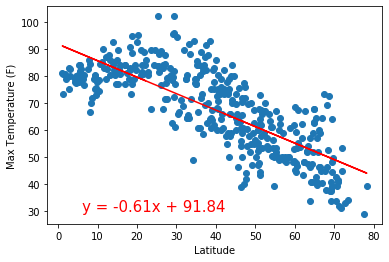

In [19]:
x_values= n_df["Lat"]
y_values= n_df["Max Temperature (F)"]
linearplot(x_values, y_values, "Max Temperature (F)", (6,30))


plt.savefig("../Python_API/output_data/Northern_City Lat vs. Max_Temp(F).png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.78


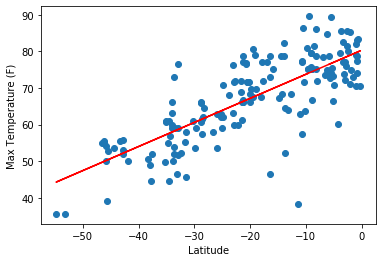

In [20]:
x_values= s_df["Lat"]
y_values= s_df["Max Temperature (F)"]
linearplot(x_values, y_values, "Max Temperature (F)", (-30,30))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Max_Temp(F).png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05


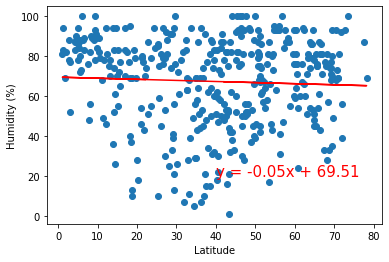

In [21]:
x_values= n_df["Lat"]
y_values= n_df["Humidity (%)"]
linearplot(x_values, y_values, "Humidity (%)", (40,20))
plt.savefig("../Python_API/output_data/Northern_City Lat vs. Humidity(%).png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.27


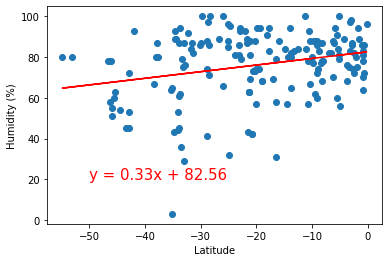

In [22]:
x_values= s_df["Lat"]
y_values= s_df["Humidity (%)"]
linearplot(x_values, y_values, "Humidity (%)", (-50,20))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Humidity(%).png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14


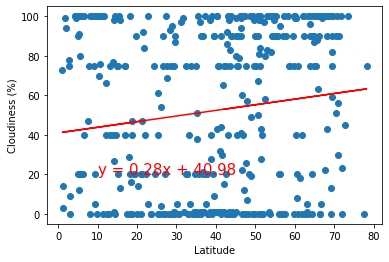

In [23]:
x_values= n_df["Lat"]
y_values= n_df["Cloudiness (%)"]
linearplot(x_values, y_values, "Cloudiness (%)", (10,20))
plt.savefig("../Python_API/output_data/Northern_City Lat vs. Cloudiness (mph).png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15


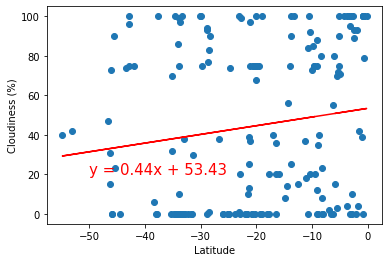

In [24]:
x_values=s_df["Lat"]
y_values= s_df["Cloudiness (%)"]
linearplot(x_values, y_values, "Cloudiness (%)", (-50,20))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Cloudiness (mph).png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03


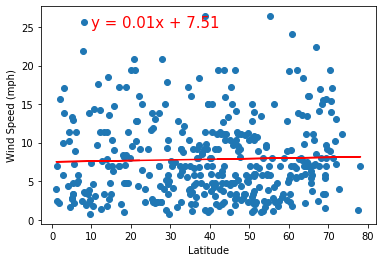

In [25]:
x_values= n_df["Lat"]
y_values= n_df["Wind Speed (mph)"]
linearplot(x_values, y_values, "Wind Speed (mph)", (10,25))
plt.savefig("../Python_API/output_data/Northern_City Lat vs. Wind Speed (mph).png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.28


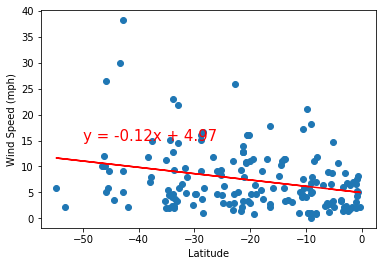

In [26]:
x_values= s_df["Lat"]
y_values= s_df["Wind Speed (mph)"]
linearplot(x_values, y_values, "Wind Speed (mph)", (-50,15))
plt.savefig("../Python_API/output_data/Southern_City Lat vs. Wind Speed (mph).png")
plt.show()